In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Data

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
#it seems like we have so many categorical features to be tackled

In [6]:
#let's explore the percentage of the churn customer
len(df[df['Churn']=='Yes'])/len(df)

0.2653698707936959

In [7]:
#so we have very small percentage of the customer churn which we will take into account in later part

# Exploring the Data

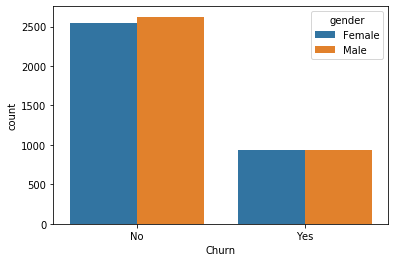

In [8]:
#let's check which of the one from 2 genders have high customer churn
sns.countplot(x='Churn',data=df,hue='gender')

In [9]:
#looks like there is no correlation

In [10]:
# as we observed above the senior citizen column was in float, but we know it is a categorical feature. Let's explore
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [11]:
#so we guessed it right
df['SeniorCitizen']=df['SeniorCitizen'].astype('str')

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# now as a good practice it is recommended to check all of the categorical feature to check if there are many missing value
object_type=df.select_dtypes('object')
for x in object_type.columns:
    print(x)
    print(df[x].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
['0' '1']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
['No' 'Yes']


In [14]:
#seems like our data is in good shape and have no missing values
# as we observed above the total charges is a numeric variable but here marked as categorical, so let's convert in
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'])
#running the above line of code reveal an error. It means we have empty entry in total charges column
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
#we guessed it right, let's impute these values as 0 
df.loc[df['TotalCharges'] == ' ','TotalCharges']=0

In [16]:
#so now it is time to convert it into numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [17]:
#one last column that has been left to explore is tenure let's explore it too
df['tenure'].unique()
#it is in good shape though

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

# Preparing the Data

In [18]:
#now it is time to prepare the data to be fit into machine learning algorithm
df.drop('customerID',axis=1,inplace=True)

In [19]:
#let's split the data into set of dependant and independant variables
X=df.drop('Churn',axis=1)
y=df['Churn'].copy()

In [20]:
#we saw the churn column is encoded as yes or no let's convert it into binary
y.replace(to_replace=['No','Yes'],value=[0,1],inplace=True)

In [21]:
#now let us create a datapipeline to automate our work
#first we need to take care of categorical and numeric features
cat_features=X.select_dtypes('object')
cat_features_index=[]
num_features_index=[]
for col in cat_features.columns:
    cat_features_index.append(X.columns.get_loc(col))
for col in X.columns:
    if not col in cat_features.columns:
        num_features_index.append(X.columns.get_loc(col))

In [22]:
#let's build a custom feature selector that seprates num and cat features
from sklearn.base import TransformerMixin, BaseEstimator
class feature_selector(BaseEstimator,TransformerMixin):
    def __init__(self,features_index):
        self.features_index=features_index
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X.iloc[:,self.features_index]

In [23]:
#now it is time to build a transformer that takes all the data and apply transformation to features we want
from sklearn.preprocessing import OneHotEncoder
class cat_transformer(BaseEstimator,TransformerMixin):
    def __init__(self,cat_feature_index):
        self.cat_feature_index=cat_feature_index
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X=X.copy()
        encoder=OneHotEncoder(sparse=False,categories='auto')
        encoded=encoder.fit_transform(X[:,:len(cat_features_index)])
        return encoded

In [24]:
#now it's time to make a categorical pipeline for all the steps 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
cat_pipeline=Pipeline(steps=[('cat_feature_selector',feature_selector(cat_features_index)),
                             ('cat_imputer',SimpleImputer(strategy='most_frequent')),
                             ('cat_transformer',cat_transformer(cat_features_index)),
    
])

In [25]:
#similarly let's make the pipeline to handle the numeric data
num_pipeline=Pipeline(steps=[('num_feature_selector',feature_selector(num_features_index)),
                             ('num_imputer',SimpleImputer(strategy='median'))
    
])

In [26]:
#now let's combine the two pipeline into one clean looking pipeline
from sklearn.pipeline import FeatureUnion
full_pipeline=FeatureUnion(transformer_list=[('cat_pipeline',cat_pipeline),
                                             ('num_pipeline',num_pipeline),
    
])

# Training the Model

In [27]:
#now we start to begin the real work by first trying to use XGBOOST Classifier

In [28]:
#let's make the training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [29]:
#to check if the stratified sampling has been correctly done
sum(y_train)/len(y_train)

0.2654297614539947

In [30]:
sum(y_test)/len(y_test)

0.26519023282226006

In [31]:
#the training and testing set seems promising, now let's move ahead apply transformation on X_train
X_train=full_pipeline.fit_transform(X_train)
X_test=full_pipeline.transform(X_test)

In [32]:
#we are first going to try XGBoost Classifier
import xgboost as xgb

In [33]:
#let's first try a very basic one and later we will tune the hyperparameters
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',missing=None,seed=42)
clf_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.63252
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.64752
[2]	validation_0-aucpr:0.64563
[3]	validation_0-aucpr:0.64395
[4]	validation_0-aucpr:0.63845
[5]	validation_0-aucpr:0.64413
[6]	validation_0-aucpr:0.64622
[7]	validation_0-aucpr:0.64848
[8]	validation_0-aucpr:0.64353
[9]	validation_0-aucpr:0.64425
[10]	validation_0-aucpr:0.64252
[11]	validation_0-aucpr:0.64150
[12]	validation_0-aucpr:0.64290
[13]	validation_0-aucpr:0.64319
[14]	validation_0-aucpr:0.64489
[15]	validation_0-aucpr:0.64378
[16]	validation_0-aucpr:0.64286
[17]	validation_0-aucpr:0.64247
Stopping. Best iteration:
[7]	validation_0-aucpr:0.64848



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
#let's test how it performed
from sklearn.metrics import plot_confusion_matrix

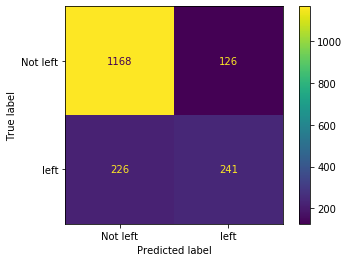

In [35]:
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=['Not left','left'])

In [36]:
#here we can see that out of 1294 people that left 1168 (90%) were correctly classified
#out of 467 that left only 241 (51%) were correctly classified
#since we had unbalanced data these results are not satisfying
#since the loss of customer is a great loss for a company so we will try to identify more of the people that are going to leave

# Fine tuning the Model

In [37]:
#let's try if we can do a better job at predicting if the customer is going to leave or not
# we are going to run two rounds of grid search cross validation
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid_1={'max_depth':[3,4,5],
              'learning_rate':[0.1,0.01,0.05],
              'gamma':[0,0.25,1.0],
              'reg_lambda':[0,1,10],
              'scale_pos_weight':[1,3,5]
    
}

In [39]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',
                         seed=42, subsample=0.9,
                         colsample_bytree=0.5)

In [40]:
grid_search=GridSearchCV(clf_xgb,param_grid_1,scoring='roc_auc',cv=3,n_jobs=-1,)

In [42]:
grid_search.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)],verbose=False)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=0.9, tree_metho

In [43]:
#let's see which parameters were the best
grid_search.best_params_

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 10,
 'scale_pos_weight': 3}

In [45]:
#as the max_depth and scale_pos_weight are in their range we have found their best combination but we need to check for others
param_grid_2={'max_depth':[4],
              'gamma':[-1,0,0.25],
              'learning_rate':[0.1,0.5,1],
              'reg_lambda':[10,20,100],
              'scale_pos_weight':[3]
}

In [49]:
grid_search=GridSearchCV(clf_xgb,param_grid_2,scoring='roc_auc',cv=3,n_jobs=-1,)

In [50]:
grid_search.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)],verbose=False)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=0.9, tree_metho

In [51]:
grid_search.best_params_

{'gamma': 0,
 'learning_rate': 0.5,
 'max_depth': 4,
 'reg_lambda': 100,
 'scale_pos_weight': 3}

In [53]:
#looks like in all other department we have done a good job
#let's try one last effort for reg_lambda
param_grid_3={'max_depth':[4],
              'gamma':[0],
              'learning_rate':[0.5],
              'reg_lambda':[150,200,500,800,1000],
              'scale_pos_weight':[3]
}

In [55]:
grid_search=GridSearchCV(clf_xgb,param_grid_3,scoring='roc_auc',cv=3,n_jobs=-1,)

In [56]:
grid_search.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)],verbose=False)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=0.9, tree_metho

In [57]:
grid_search.best_params_

{'gamma': 0,
 'learning_rate': 0.5,
 'max_depth': 4,
 'reg_lambda': 800,
 'scale_pos_weight': 3}

In [58]:
#looks like we have found an optimal combination
final_clf=xgb.XGBClassifier(objetive='binary:logistic',
                           seed=42,
                           learning_rate=0.5,
                           gamma=0,
                           max_depth=4,
                           scale_pos_weight=3,
                           reg_lambda=800,
                           subsample=0.9,
                           colsample_bytree=0.5)

In [59]:
final_clf.fit(X_train,y_train,eval_metric='aucpr',early_stopping_rounds=10,eval_set=[(X_test,y_test)],verbose=True)

[13:09:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { objetive } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.45640
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.49027
[2]	validation_0-aucpr:0.54105
[3]	validation_0-aucpr:0.55495
[4]	validation_0-aucpr:0.60454
[5]	validation_0-aucpr:0.60714
[6]	validation_0-aucpr:0.60761
[7]	validation_0-aucpr:0.61167
[8]	validation_0-aucpr:0.61078
[9]	validation_0-aucpr:0.60719
[10]	validation_0-aucpr:0.60745
[11]	validation_0-aucpr:0.62315
[12]	validation_0-aucpr:0.62561
[13]	validation_0-aucpr:0.62648
[14]	validation_0-aucpr:0.63156
[15]	validation_0-aucpr:0.63360
[16]	validation_0-aucpr:0.63337
[17]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objetive='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=800, scale_pos_weight=3, seed=42, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

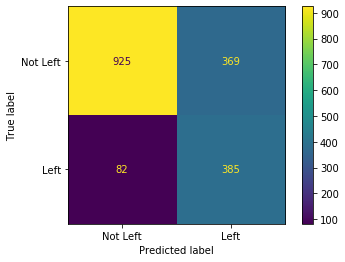

In [60]:
#now let's check if our results has been improved or not
plot_confusion_matrix(final_clf,X_test,y_test,values_format='d',display_labels=['Not Left','Left'])

In [63]:
#here we can see that out of 467 people that left 385 (82.4%) were correctly classified
#previously it was 51% so 82.4% is a good percentage
#this however has come at the cost of misclassifying customers that are not going to leave